In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
%matplotlib inline

In [2]:
#Predicting if a person would buy life insurnace based on his age using logistic regression
id = pd.read_csv("data/insurance_data.csv")
id.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


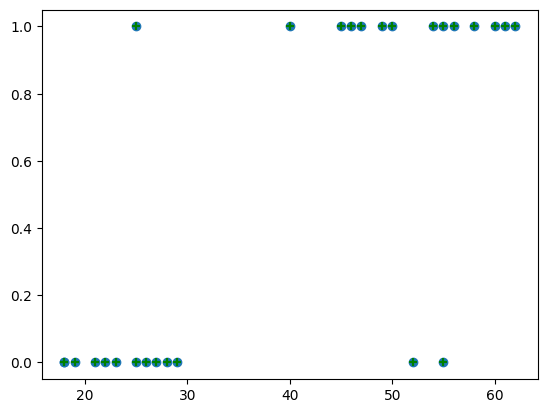

In [63]:
plt.scatter(id.age, id.bought_insurance, marker="+", color="green")
plt.show()

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(id[['age']], id['bought_insurance'], test_size=0.2)

In [4]:
X_test

,age
17,58
23,45
5,56
11,28
12,27
13,29


In [5]:
model.fit(X_train, Y_train)

LogisticRegression()

In [6]:
X_test

,age
17,58
23,45
5,56
11,28
12,27
13,29


In [7]:
y_predicted = model.predict(X_test)

In [8]:
model.predict_proba(X_test)

array([[0.09714029, 0.90285971],
       [0.31912632, 0.68087368],
       [0.1188875 , 0.8811125 ],
       [0.76253675, 0.23746325],
       [0.78242245, 0.21757755],
       [0.7414342 , 0.2585658 ]])

In [9]:
model.score(X_test,Y_test)

1.0

In [10]:
y_predicted

array([1, 1, 1, 0, 0, 0])

In [11]:
model.coef_

array([[0.11320163]])

In [12]:
model.intercept_

array([-4.33628337])

In [13]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [14]:
def prediction_function(age):
    z = 0.11 * age - 4.41
    y = sigmoid(z)
    return y

In [15]:
age = 35
prediction_function(age)

0.36354745971843366

In [16]:
#0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [17]:
prediction_function(25)

0.15976199694366905

In [18]:
prediction_function(43)

0.5793242521487495

In [19]:
#Excercise HR analytics from kaggle
hra = pd.read_csv("data/HR_comma_sep.csv")
hra.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
left=hra[hra.left==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
left.shape

(3571, 10)

In [22]:
len(hra)

14999

In [23]:
hra.left

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [24]:
hra.left==1

0        True
1        True
2        True
3        True
4        True
         ... 
14994    True
14995    True
14996    True
14997    True
14998    True
Name: left, Length: 14999, dtype: bool

In [25]:
hra.left==2

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: left, Length: 14999, dtype: bool

In [26]:
hra.groupby('left')

In [27]:
retained = hra[hra.left==0]
retained.shape

(11428, 10)

In [28]:
hra.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Conclusions:

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

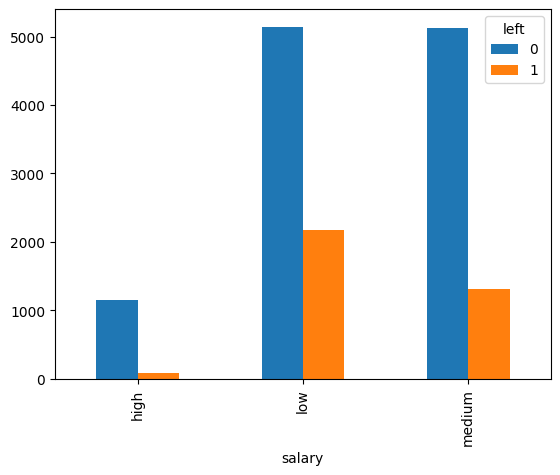

In [71]:
pd.crosstab(hra['salary'], hra['left']).plot(kind='bar')
plt.show()

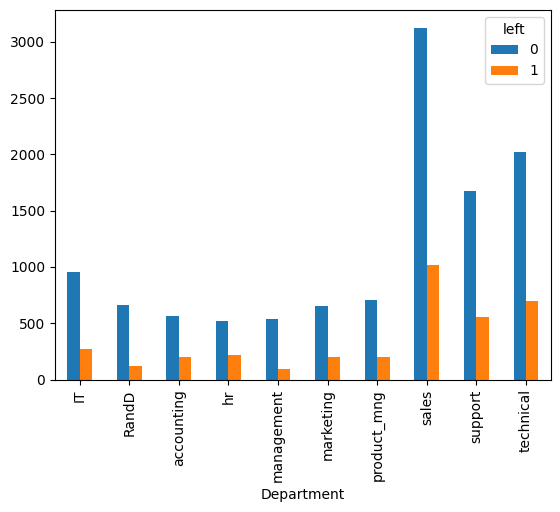

In [75]:
pd.crosstab(hra.Department, hra.left).plot(kind='bar')
plt.show()

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**


In [90]:
sub_hra = hra[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
sub_hra.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [92]:
sub_hra_dummies = pd.get_dummies(sub_hra.salary, prefix='salary')
sub_hra_dummies.head()

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [114]:
sub_hra_with_dummies = pd.concat([sub_hra, sub_hra_dummies], axis='columns')
sub_hra_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [116]:
X = sub_hra_with_dummies.drop(['salary', 'salary_medium'], axis='columns')
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True


In [158]:
y=hra.left
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [160]:
X_train.shape

(11999, 5)

In [164]:
model_hra = LogisticRegression()

In [166]:
model_hra.fit(X_train, y_train)

D:\projects\dev\ml\conda\pro1\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
model_hra.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [170]:
model_hra.score(X_test, y_test)

0.7686666666666667

In [172]:
model_hra.predict([[0.4, 200, 1, True, False]])

array([0])